In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_file = "training_data.csv"
df = pd.read_csv(data_file)

# Cleanup
df = df.rename(columns=lambda x: x.strip())
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
rooms = set(df['real_room']).union(set(df['room']))
room_dtype = pd.CategoricalDtype(categories=list(rooms), ordered=True)
df['room'] = df['room'].astype(room_dtype)
df['real_room'] = df['real_room'].astype(room_dtype)

KeyError: 'real_room'

In [66]:
list(df['room'].dtype.categories)

['esszimmer',
 'garten',
 'kueche',
 'wohnzimmeroben',
 'sofa',
 'küche',
 'az_oben',
 'arbeitszimmer',
 'kinderzimmer',
 'schlafzimmer',
 'wohnzimmer']

In [26]:
df[df['# device'] == "martins_apple_watch" and df['tx_power'] > 0]['tx_power'].unique()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/tmp/ipykernel_449868/10187827.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90) # set new labels


<Figure size 2880x432 with 0 Axes>

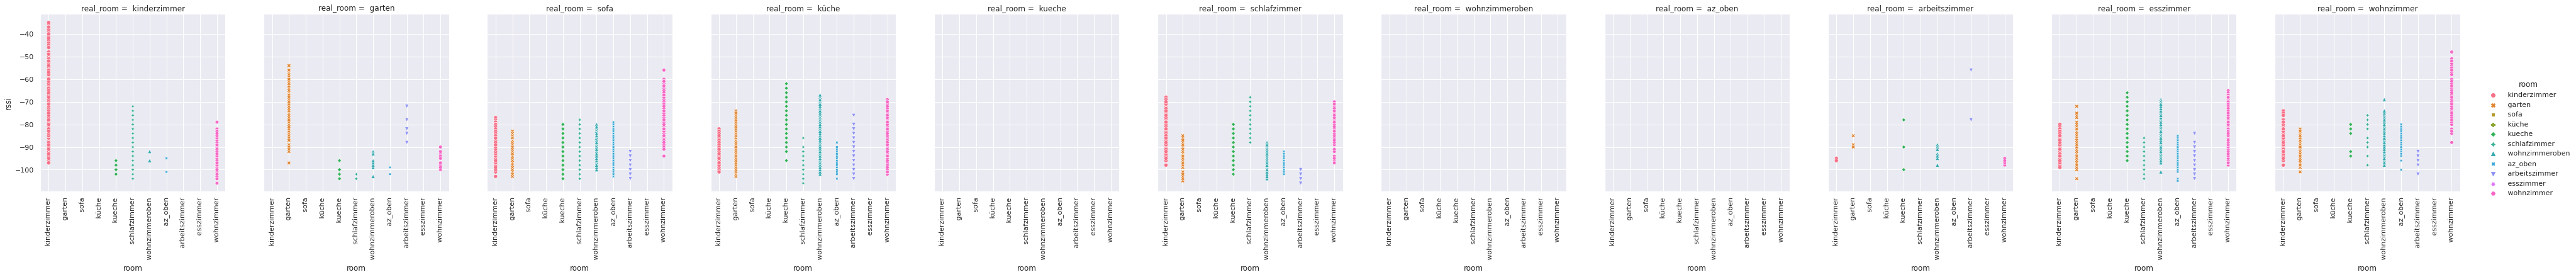

In [28]:
plt.rcParams["xtick.labelsize"] = 5
sns.set_theme()
plt.figure(figsize=(40, 6))
g = sns.relplot(data=df, x="room", y="rssi", style="room", hue="room", col="real_room")
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

# SVM

In [3]:
from sklearn import svm


CategoricalDtype(categories=[' arbeitszimmer', ' küche', ' wohnzimmer', ' kinderzimmer',
                  ' kueche', ' wohnzimmeroben', ' schlafzimmer', ' garten',
                  ' az_oben', ' esszimmer', ' sofa'],
, ordered=True)

In [11]:
def cleanup_data(df):
  df['real_room']
df

# device             room   rssi   tx_power       real_room
0           martins_iphone   wohnzimmeroben    -90         12   arbeitszimmer
1      martins_apple_watch       wohnzimmer    -97          2   arbeitszimmer
2           martins_iphone           garten    -89         -1   arbeitszimmer
3           martins_iphone   wohnzimmeroben    -89         12   arbeitszimmer
4           martins_iphone           garten    -89         -1   arbeitszimmer
...                    ...              ...    ...        ...             ...
49258  martins_apple_watch     kinderzimmer    -91          8            sofa
49259       martins_iphone           kueche    -96         12            sofa
49260       martins_iphone       wohnzimmer    -69          2            sofa
49261       martins_iphone           garten    -86          2            sofa
49262  martins_apple_watch   wohnzimmeroben    -86          8            sofa

[49263 rows x 5 columns]